In [1]:
import numpy as np
import matplotlib.pyplot as plt

def return_data(N, f, noise):
    ''' data generating function '''
    X = np.random.uniform(0,6, N)
    Y = f(X) + noise*np.random.rand(N)
    return X, Y

def plot(X,Y):
    plt.xlabel(r"$x$", fontsize=20); plt.ylabel(r"$y$", fontsize=20)
    plt.xlim(0,6); plt.ylim(-1.5, 2.5)
    plt.scatter(X, Y, alpha=0.5)

## 1-2. 多項式フィッティング
早速ですが機械学習してみます。以下では、あらかじめ定義しておいたデータ生成関数をもちいて実際に10点ほどデータを取ってみたものです：


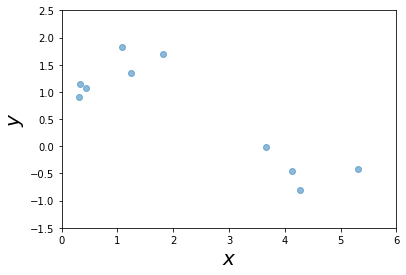

In [3]:
X, Y = return_data(10, np.sin, 1)
plot(X, Y); plt.show()

これを多項式関数

$$
f_{M}(x) =
\sum_{i=0}^M a_i x^i
$$

の $a_i$ をうまく調節してこのデータにフィッティングすることを考えます。 $M=\color{blue}1, \color{green}3, \color{red}{50}$ でやってみると,

In [5]:
f1 = np.poly1d(np.polyfit(X, Y, deg=1))
f3 = np.poly1d(np.polyfit(X, Y, deg=3))
f50 = np.poly1d(np.polyfit(X, Y, deg=50))

/Users/akinoritanaka/.pyenv/versions/anaconda3-4.3.1/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2881: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


どれくらいうまくフィッティングできているか見てみます：

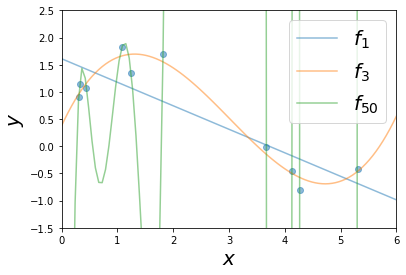

In [6]:
plot(X, Y)
X_ = np.linspace(0, 6, 100)
for f in [f1, f3, f50]:
    plt.plot(X_, f(X_), alpha=0.5, label=r"$f_{%d}$"%f.order)
plt.legend(fontsize=20); plt.show()

のようになりました。$f_1$ は線形なので曲がった曲線が表現できず駄目に見えます。$f_3$ は結構いいように見えますが、より次数を上げた $f_{50}$ のほうが更に良く当てはめられているように思えます。

### 更にデータを加えてみる
一番データを上手くフィットしているモデル $f_{50}$ の性能を確かめるために、別のデータを取ってみます。

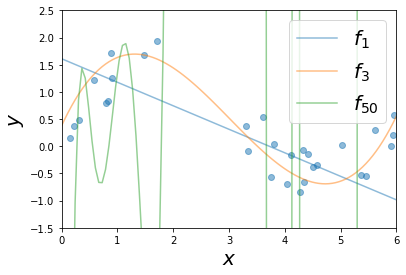

In [7]:
X_new, Y_new = return_data(30, np.sin, 1)
plot(X_new, Y_new)
X_ = np.linspace(0, 6, 100)
for f in [f1, f3, f50]:
    plt.plot(X_, f(X_), alpha=0.5, label=r"$f_{%d}$"%f.order)
plt.legend(fontsize=20); plt.show()

こうしてみると、むしろ $f_3$ のほうが良いことがわかります。
$f_{50}$ はパラメータ数が多い分、与えられたデータへの当てはめは得意ですが、あまりにも過剰にパラメータがあると与えられたデータにのみ固執してしまい、未知のデータには使えなくなってしまうというわけです。これを **過剰適合** と呼びます。

一方で $f_1$ のようにパラメータ数が少なすぎて与えられたデータへの当てはめすらも上手くいかない状況を **過小適合** といいます。

この例からわかるのは、過剰適合でも過小適合でもない、「いい塩梅のフィッティング」をしないと、与えられたデータの当てはめから知らないデータの振る舞いを上手く予想することはできないということです。この節ではここでの教訓が、機械学習のほとんどあらゆる場面で有効だということを理論的に説明することを目的とします。